In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
# Load results
df_fva = pd.read_excel('./results/FVA_RBA_bounds.xlsx')
df_fva.index = df_fva.rxn.to_list()

# Remove pseudoreaction
df_fva = df_fva[df_fva.subsystem != 'Pseudoreaction']
# Handle reversible rxns with non-zero reverse flux
df_fva = df_fva[(df_fva.fva_max > 0) | (df_fva.fva_min < 0)]

# Load pathway assignment
ss_dict = dict()
df_path = pd.read_excel('./input/pathway_regroup.xlsx')

for i in df_path.index:
    p,pgroup = df_path.loc[i, ['Pathway', 'Pathway group']]
    if pd.isnull(p) == False:
        ss_dict[p] = pgroup
ss_dict['Transport'] = 'Transport'
ss_dict['Exchange'] = 'Exchange'
ss_dict['Pseudoreaction'] = 'Pseudoreaction'
        
# Update pathway assignment to result dataframe 
for i in df_fva.index:
    df_fva.loc[i, 'subsystem_group'] = ss_dict[df_fva.subsystem[i]]

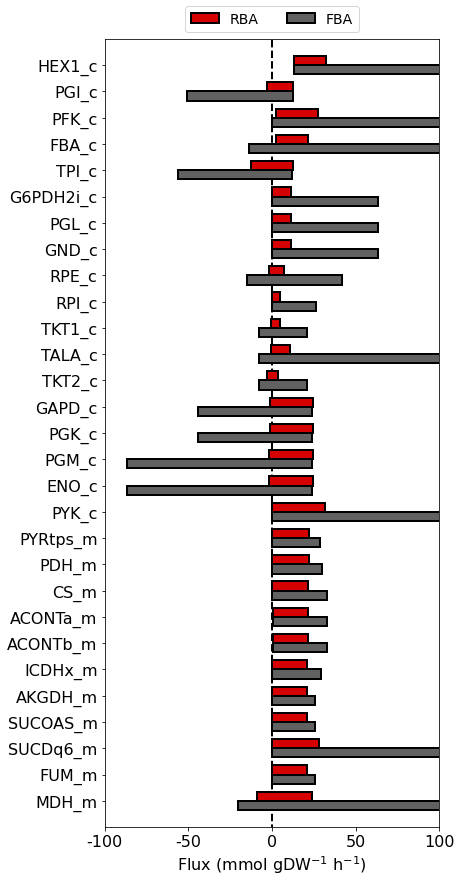

In [3]:
rxns_plot = ['HEX1_c', 'PGI_c', 'PFK_c', 'FBA_c', 'TPI_c', 'G6PDH2i_c',
             'PGL_c', 'GND_c', 'RPE_c', 'RPI_c', 'TKT1_c', 'TALA_c',
             'TKT2_c', 'GAPD_c', 'PGK_c', 'PGM_c', 'ENO_c', 'PYK_c',
             'PYRtps_m', 'PDH_m', 'CS_m', 'ACONTa_m', 'ACONTb_m',
             'ICDHx_m', 'AKGDH_m', 'SUCOAS_m', 'SUCDq6_m',
             'FUM_m', 'MDH_m']
rxns_plot.reverse()

fig,ax = plt.subplots(figsize=(6,0.5*len(rxns_plot)))
rcolor = '#d50000'; fcolor = '#616161'

h = 0.7
y = range(0, len(rxns_plot))

for i,rxn in enumerate(rxns_plot):
    rmin,rmax,fmin,fmax = df_fva.loc[rxn, ['rba_min', 'rba_max', 'fva_min', 'fva_max']]
    bar1 = ax.barh(y[i]+h/4, rmax - rmin, left=rmin, height=h/2,
                   color=rcolor, ec='k', linewidth=2, zorder=2)
    bar2 = ax.barh(y[i]-h/4, fmax - fmin, left=fmin, height=h/2,
                   color=fcolor, ec='k', linewidth=2, zorder=2)

# Beautify
line = mlines.Line2D([0, 0], [-2, len(rxns_plot)+1], color='k',
                     linestyle='--', linewidth=2, zorder=1)
ax.add_line(line);

yoff = 0
ax.set_ylim(-1, len(y))
ax.set_yticks(y);
ax.set_yticklabels(rxns_plot, fontsize=16);

ax.set_xlim(-100, 100);
xticks = [-100, -50, 0, 50, 100]
ax.set_xticks(xticks);
ax.set_xticklabels(xticks, fontsize=16);
ax.set_xlabel('Flux (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=16);

from matplotlib.patches import Patch
handles = [Patch(facecolor=rcolor, alpha=1, lw=2, ec='k'),
           Patch(facecolor=fcolor, alpha=1, lw=2, ec='k')]
legend_labels = ['RBA', 'FBA']
ax.legend(handles, legend_labels, ncol=2, loc='upper center', bbox_to_anchor=(0.5,1.05), prop={'size':14});

plt.savefig('../../scRBA_figures/components/Fig6_flux_ranges_centralmetab.png', transparent=True, bbox_inches='tight')